# K means Labelling 

In this Notebook we use K-Means algorithim to clusterize the different political spectrums in the Twitter community- We used the Silhoutte Metric to choose the optimal number of clusters for each Twitter user. After that, we plot the map of the of the clustering

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import sklearn.preprocessing as pp
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [5]:
rts_usuario = pd.read_pickle('../Data/rts_usuario.pkl')
rts_usuario.head()

,Retweets Derecha,Retweets Izquierda,Retweets Centro,Retweets Totales,Dummy Derecha,Dummy Izquierda,Dummy Centro,No Retweets,Afiliacion
Author ID,,,,,,,,,
12996.0,1,321,109,431,1,1,1,0,Retweets Izquierda
777978.0,1,1,1,3,1,1,1,0,Retweets Centro
784125.0,0,46,10,56,0,1,1,0,Retweets Izquierda
1061601.0,0,223,3,226,0,1,1,0,Retweets Izquierda
1488031.0,0,0,0,0,0,0,0,1,No Retweets


In [5]:
# The k_vector will store the number of RTs given to each political party.
k_vector = []

# We name the columns by political party.
column1 = 'Retweets Izquierda'
column2 = 'Retweets Centro'
column3 = 'Retweets Derecha'

# Now we iterate to create 3-dimensional vectors.
for index, row in rts_usuario.iterrows():
    value1 = row[column1]
    value2 = row[column2]
    value3 = row[column3]
    vector = [value1, value2, value3]
    # and we store this info in the k_vector.
    k_vector.append(vector)
    
# Save a copy of the k_vector...   
v = k_vector

In [53]:
# Scale the vector to avoid outliers influence on the clustering
k_vector = np.array(k_vector)
scaler = StandardScaler()
vector_scaled = scaler.fit_transform(k_vector)
vector_scaled

array([[ 0.81809265,  2.65880069, -0.19103629],
       [-0.32655287, -0.28756114, -0.19103629],
       [-0.1655871 , -0.04203098, -0.20020723],
       ...,
       [-0.33012989, -0.31484226, -0.20020723],
       [ 0.25650094,  0.09437466, -0.19103629],
       [-0.21924236, -0.1511555 , -0.20020723]])

In [ ]:
# After this, we are ready to run the K-means algo.
silhouette_list = []
k_clusters = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k) # Initiate the K-Means Instance
    kmeans.fit(vector_scaled) # Fit
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    score = silhouette_score(vector_scaled,cluster_labels) # Get Silhouette score
    silhouette_list.append((score))
    k_clusters.append(k) # Append for future analisis

temp = {
   'Silhoette Score': silhouette_list,
   'Number of Clusters': k_clusters
}
silhouette_data = pd.DataFrame(temp)

/home/fcastrillon/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

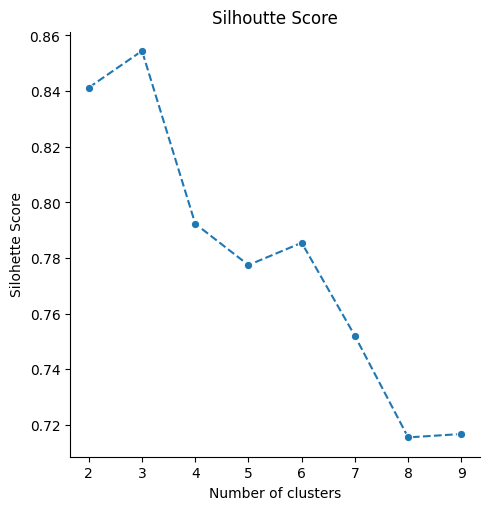

In [57]:
sns.relplot(kind = 'line',
            data = silhouette_data,
            x = 'Number of Clusters',
            y = 'Silhoette Score',
            marker = 'o',
            linestyle = '--')
plt.title('Silhoutte Score')
plt.ylabel('Silohette Score')
plt.xlabel('Number of clusters')
plt.show

We see that 4 cluster is the ideal number of cluster for this process, in this sense, we run again the K-means algobut just using 4 clusters

In [58]:
# We are ready to run the K-means algo using just 3 clusters.
kmeans = KMeans(n_clusters = 3)
kmeans.fit(vector_scaled)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# We create a dictionary which stores all clusters.
clusters = {}
for i, label in enumerate(cluster_labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(v[i])

/home/fcastrillon/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


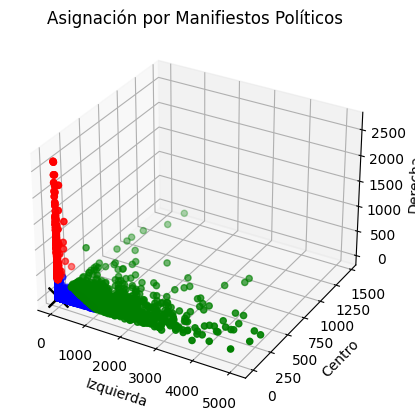

In [62]:
# Finally, we plot the data.
izq_radical = clusters[list(clusters.keys())[0]]
izq_moderada = clusters[list(clusters.keys())[1]]
derecha = clusters[list(clusters.keys())[2]]

x1 = [v[0] for v in izq_radical]
y1 = [v[1] for v in izq_radical]
z1 = [v[2] for v in izq_radical]

x2 = [v[0] for v in izq_moderada]
y2 = [v[1] for v in izq_moderada]
z2 = [v[2] for v in izq_moderada]

x3 = [v[0] for v in derecha]
y3 = [v[1] for v in derecha]
z3 = [v[2] for v in derecha]

x4 = cluster_centers[:, 0]
y4 = cluster_centers[:, 1]
z4 = cluster_centers[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x1, y1, z1, color = 'b')
ax.scatter(x2, y2, z2, color = 'g')
ax.scatter(x3, y3, z3, color = 'r')
ax.scatter(x3, y3, z3, color = 'r')
ax.scatter(x4, y4, z4, color = 'black', marker = 'x', s = 200)

# Set labels and title
ax.set_xlabel('Izquierda')
ax.set_ylabel('Centro')
ax.set_zlabel('Derecha')
ax.set_title('3D Vector Plot')
ax.set_title('Asignación por Manifiestos Políticos')

plt.show()